<a href="https://colab.research.google.com/github/hk-kiran/autoencoder_1D_data/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout, UpSampling2D
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from termcolor import colored, cprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import matplotlib
import scipy
import numpy as np
import math
import datetime
%matplotlib inline
%load_ext tensorboard

In [ ]:
testdata = pd.read_csv('test.csv')
traindata = pd.read_csv('train.csv')

le = LabelEncoder()
le.fit(['WALKING_UPSTAIRS', 'SITTING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING', 'STANDING'])

y_train = traindata["Activity"]
y_train = le.fit_transform(y_train)

y_test = testdata["Activity"]
y_test = le.fit_transform(y_test)

traindata = traindata.drop(["Activity"],axis = 1)
train_set = traindata.drop(["subject"],axis = 1)
testdata = testdata.drop(["Activity"],axis = 1)
test_set = testdata.drop(["subject"],axis =1)

x_train, x_val, y_train, y_val = train_test_split(train_set, y_train, test_size=0.3, random_state=42)

In [ ]:
input_shape = 561
encode = Input((input_shape,))
#encoder
layer1 = Dense(1024,activation='relu',activity_regularizer=regularizers.l2(10e-6))(encode)
layer2 = Dense(512,activation='relu',activity_regularizer=regularizers.l2(10e-6))(layer1)
layer3 = BatchNormalization()(layer2)
layer4 = Dense(256,activation='relu',activity_regularizer=regularizers.l2(10e-6))(layer3)
#max compression layer
encoded = Dense(128,activation='relu',activity_regularizer=regularizers.l2(10e-6), name = 'encoded')(layer4)

#decoder
layer5 = Dense(256,activation='relu',activity_regularizer=regularizers.l2(10e-6))(encoded)
layer6 = BatchNormalization()(layer5)
layer6 = Dense(512,activation='relu',activity_regularizer=regularizers.l2(10e-6))(layer6)
layer7 = Dense(1024,activation='relu',activity_regularizer=regularizers.l2(10e-6))(layer6)
decode = Dense(input_shape,activation='tanh',name = 'decoded')(layer7)

In [ ]:
autoencoder = Model(encode, decode)
autoencoder.compile(loss='mse', optimizer = 'adam')

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              575488    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
encoded (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               3302

In [ ]:
!rm -rf ./logs/ 
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

autoencoder_train = autoencoder.fit(x_train, x_train, batch_size=32,epochs=40,validation_data=(x_val, x_val),callbacks=[tensorboard_callback])

Epoch 1/40
161/161 [==============================] - 2s 12ms/step - loss: 0.0481 - val_loss: 0.0818
Epoch 2/40
161/161 [==============================] - 2s 11ms/step - loss: 0.0263 - val_loss: 0.0343
Epoch 3/40
161/161 [==============================] - 2s 11ms/step - loss: 0.0223 - val_loss: 0.0307
Epoch 4/40
161/161 [==============================] - 2s 11ms/step - loss: 0.0205 - val_loss: 0.0224
Epoch 5/40
161/161 [==============================] - 2s 11ms/step - loss: 0.0191 - val_loss: 0.0229
Epoch 6/40
161/161 [==============================] - 2s 11ms/step - loss: 0.0178 - val_loss: 0.0247
Epoch 7/40
161/161 [==============================] - 2s 11ms/step - loss: 0.0176 - val_loss: 0.0273
Epoch 8/40
161/161 [==============================] - 2s 11ms/step - loss: 0.0173 - val_loss: 0.0216
Epoch 9/40
161/161 [==============================] - 2s 11ms/step - loss: 0.0163 - val_loss: 0.0315
Epoch 10/40
161/161 [==============================] - 2s 11ms/step - loss: 0.0161 - val_lo

In [ ]:
%tensorboard --logdir logs/fit

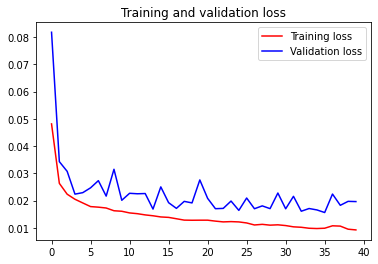

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(40)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
np.max(abs(pred-test_set.to_numpy()))

1.9448009374739075

In [ ]:
mean_squared_error(test_set,pred)

0.02196770298655781